In [458]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from yellowbrick.regressor import ResidualsPlot
import matplotlib.gridspec as gridspec

**Importing and cleaning data**

In [578]:
#import dataframe
fifa = pd.read_csv('fifa.csv',index_col=0)

In [579]:
#first 5 rows
fifa.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [580]:
#shape of dataframe
fifa.shape

(18207, 88)

In [581]:
#subsetting
fifa = fifa[['Name', 'Age', 'Nationality', 'Overall',
       'Potential', 'Club', 'Value', 'Wage',
       'Preferred Foot', 'Position', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']]

In [582]:
#exploring datatypes
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             18207 non-null  object 
 1   Age              18207 non-null  int64  
 2   Nationality      18207 non-null  object 
 3   Overall          18207 non-null  int64  
 4   Potential        18207 non-null  int64  
 5   Club             17966 non-null  object 
 6   Value            18207 non-null  object 
 7   Wage             18207 non-null  object 
 8   Preferred Foot   18159 non-null  object 
 9   Position         18147 non-null  object 
 10  Crossing         18159 non-null  float64
 11  Finishing        18159 non-null  float64
 12  HeadingAccuracy  18159 non-null  float64
 13  ShortPassing     18159 non-null  float64
 14  Volleys          18159 non-null  float64
 15  Dribbling        18159 non-null  float64
 16  Curve            18159 non-null  float64
 17  FKAccuracy  

In [583]:
# rows with any NaN value
fifa[fifa.isna().any(axis=1)]

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,Position,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
452,L. Paredes,24,Argentina,80,85,NaN,€0,€0,Right,CM,...,57.0,74.0,73.0,75.0,72.0,9.0,14.0,6.0,9.0,10.0
538,A. Granqvist,33,Sweden,80,80,NaN,€0,€0,Right,LCB,...,79.0,78.0,82.0,83.0,79.0,7.0,9.0,12.0,10.0,15.0
568,A. Lunev,26,Russia,79,81,NaN,€0,€0,Right,GK,...,15.0,69.0,18.0,20.0,12.0,80.0,73.0,65.0,77.0,85.0
677,I. Smolnikov,29,Russia,79,79,NaN,€0,€0,Right,RB,...,41.0,73.0,76.0,76.0,80.0,7.0,12.0,10.0,8.0,15.0
874,A. Dzyuba,29,Russia,78,78,NaN,€0,€0,Right,ST,...,77.0,70.0,21.0,15.0,19.0,15.0,12.0,11.0,11.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17197,V. Kaith,21,India,55,64,NaN,€0,€0,Right,GK,...,13.0,29.0,8.0,12.0,11.0,55.0,50.0,57.0,59.0,53.0
17215,K. Taimi,26,Finland,55,57,NaN,€0,€0,Right,RB,...,33.0,36.0,51.0,58.0,64.0,11.0,9.0,9.0,12.0,12.0
17339,S. Passi,23,India,54,63,NaN,€0,€0,Right,NaN,...,58.0,45.0,14.0,23.0,21.0,8.0,6.0,13.0,9.0,10.0
17436,D. Lalhlimpuia,20,India,54,67,NaN,€0,€0,Right,NaN,...,55.0,46.0,26.0,17.0,13.0,7.0,8.0,12.0,11.0,11.0


In [584]:
#changing the dtype of value column
fifa['Value'] = fifa['Value'].apply(lambda x: x[1:])
fifa["Wage"] = fifa["Wage"].apply(lambda x: x[1:])

def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return 0.0

fifa['Value'] = fifa['Value'].apply(value_to_float)
fifa['Wage'] = fifa['Wage'].apply(value_to_float)

In [585]:
#removing NaNs
fifa.dropna(inplace=True)

**Exploratory Analysis**

In [586]:
#descriptive statistics
fifa.describe().apply(lambda x: x.apply('{0:.5f}'.format)).T

,count,mean,std,min,25%,50%,75%,max
Age,17918.00000,25.10526,4.67537,16.00000,21.00000,25.00000,28.00000,45.00000
Overall,17918.00000,66.23680,6.92924,46.00000,62.00000,66.00000,71.00000,94.00000
Potential,17918.00000,71.32933,6.14410,48.00000,67.00000,71.00000,75.00000,95.00000
Value,17918.00000,2448628.75321,5631804.20916,0.00000,325000.00000,700000.00000,2100000.00000,118500000.00000
Wage,17918.00000,9883.74819,22142.76899,1000.00000,1000.00000,3000.00000,9000.00000,565000.00000
Crossing,17918.00000,49.74886,18.35499,5.00000,38.00000,54.00000,64.00000,93.00000
Finishing,17918.00000,45.58115,19.51253,2.00000,30.00000,49.00000,62.00000,95.00000
HeadingAccuracy,17918.00000,52.29529,17.36782,4.00000,44.00000,56.00000,64.00000,94.00000
ShortPassing,17918.00000,58.71342,14.68034,7.00000,54.00000,62.00000,68.00000,93.00000
Volleys,17918.00000,42.93214,17.68819,4.00000,30.00000,44.00000,57.00000,90.00000


In [120]:
#checking dtypes
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17918 entries, 0 to 18206
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             17918 non-null  object 
 1   Age              17918 non-null  int64  
 2   Nationality      17918 non-null  object 
 3   Overall          17918 non-null  int64  
 4   Potential        17918 non-null  int64  
 5   Club             17918 non-null  object 
 6   Value            17918 non-null  float64
 7   Wage             17918 non-null  float64
 8   Preferred Foot   17918 non-null  object 
 9   Position         17918 non-null  object 
 10  Crossing         17918 non-null  float64
 11  Finishing        17918 non-null  float64
 12  HeadingAccuracy  17918 non-null  float64
 13  ShortPassing     17918 non-null  float64
 14  Volleys          17918 non-null  float64
 15  Dribbling        17918 non-null  float64
 16  Curve            17918 non-null  float64
 17  FKAccuracy  

Nationalities of Players

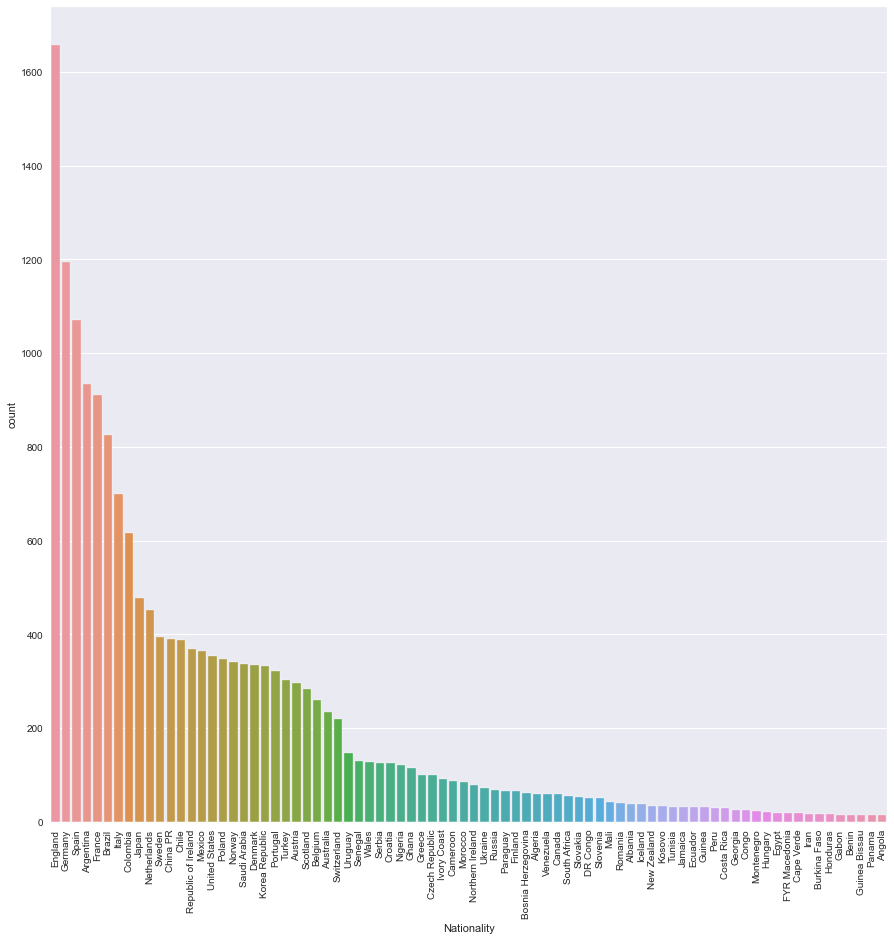

In [587]:
#nationalities count of players (first 80 countries)
plt.figure(figsize=(15,15))
ct = sns.countplot(x="Nationality",data=fifa,order=fifa["Nationality"].value_counts().iloc[:80].index)
ct.set_xticklabels(labels=fifa["Nationality"].value_counts().iloc[:80].index,rotation=90)
plt.show()

Players with highest values across columns

In [14]:
#highest rated player of each column
cols = list(fifa.select_dtypes(include=np.number).columns[1:])
j=0
while j < len(cols):
    print('Highest Player in {0} : {1}'.format(cols[j],fifa.groupby("Name")[cols[j]].max().idxmax()))
    j += 1

Highest Player in Overall : Cristiano Ronaldo
Highest Player in Potential : K. Mbappé
Highest Player in Value : Neymar Jr
Highest Player in Wage : L. Messi
Highest Player in Crossing : K. De Bruyne
Highest Player in Finishing : L. Messi
Highest Player in HeadingAccuracy : B. Dost
Highest Player in ShortPassing : David Silva
Highest Player in Volleys : E. Cavani
Highest Player in Dribbling : L. Messi
Highest Player in Curve : Quaresma
Highest Player in FKAccuracy : L. Messi
Highest Player in LongPassing : T. Kroos
Highest Player in BallControl : L. Messi
Highest Player in Acceleration : Adama
Highest Player in SprintSpeed : Adama
Highest Player in Agility : Neymar Jr
Highest Player in Reactions : Cristiano Ronaldo
Highest Player in Balance : Bernard
Highest Player in ShotPower : Cristiano Ronaldo
Highest Player in Jumping : Cristiano Ronaldo
Highest Player in Stamina : F. Kessié
Highest Player in Strength : A. Akinfenwa
Highest Player in LongShots : L. Messi
Highest Player in Aggression

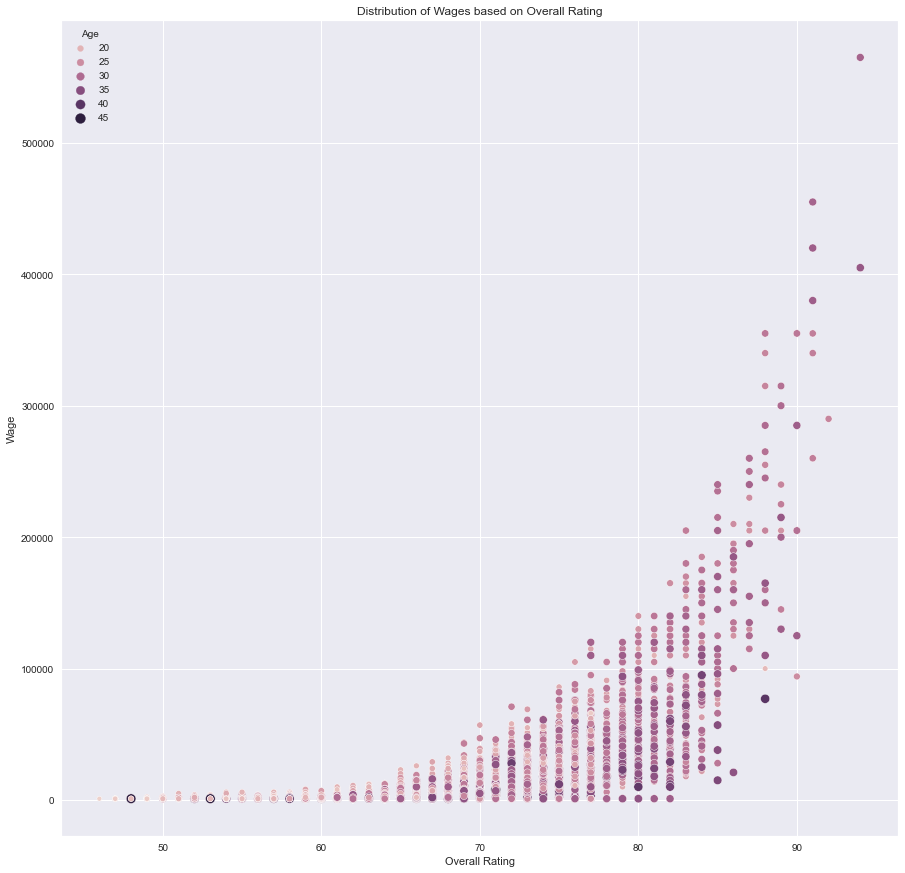

In [590]:
plt.figure(figsize=(15,15))
sns.scatterplot(x="Overall",y="Wage",data=fifa,hue="Age",size="Age")
plt.title("Distribution of Wages based on Overall Rating")
plt.xlabel("Overall Rating")
plt.ylabel("Wage")
plt.show()

Heatmap for non-goalkeepers

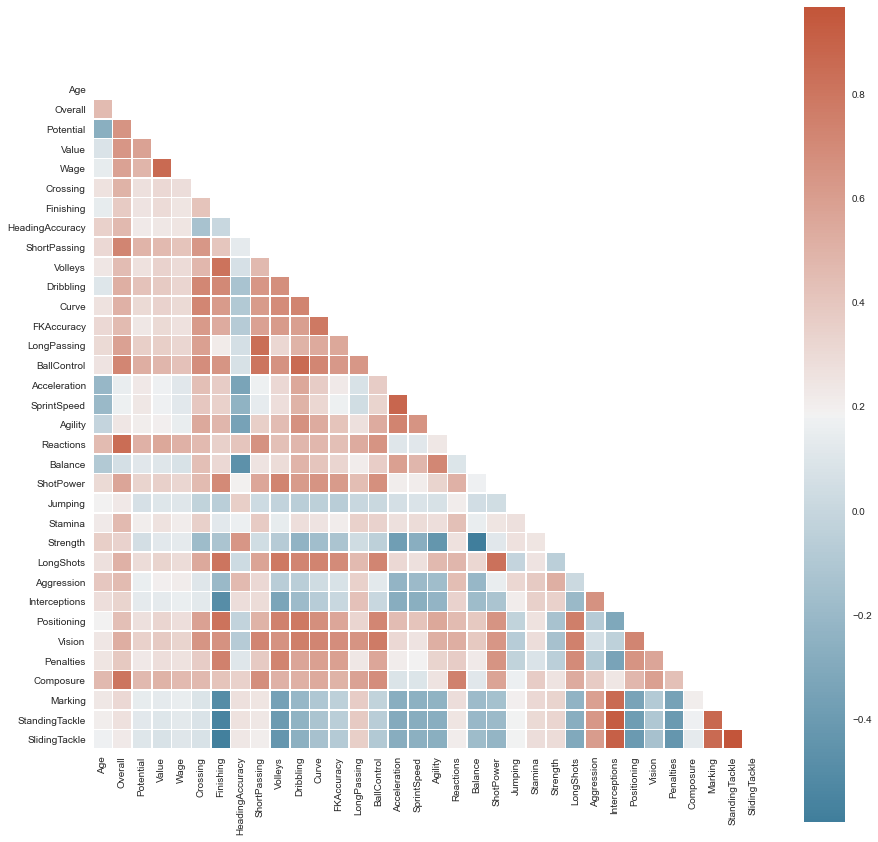

In [15]:
# heatmap to check correlated columns
corr = fifa[fifa["Position"]!="GK"][list(fifa.select_dtypes(include=np.number).columns[:-5])].corr()
f, ax = plt.subplots(figsize=(15, 15))
mask = np.triu(np.ones_like(corr, dtype=bool)) # removing the other side of the heatmap
cmap = sns.diverging_palette(230, 20, as_cmap=True) #preparing cmap
sns.heatmap(corr,mask=mask,cmap=cmap,linewidths=.5,square=True)
plt.show()

Seaborn lmplot

In [16]:
def lmplot(x,y,data):
    sns.lmplot(x,y,data,scatter_kws = {"alpha":0.2,"color":"indianred"},line_kws = {"color":"lightsalmon"})
    plt.ticklabel_format(style='plain', axis='x')
    plt.show()

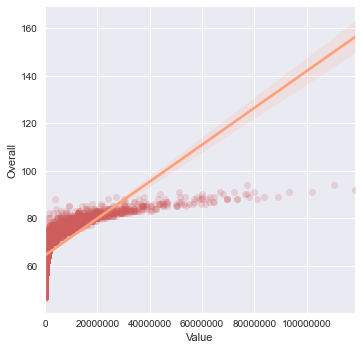

In [51]:
lmplot("Value","Overall",fifa)

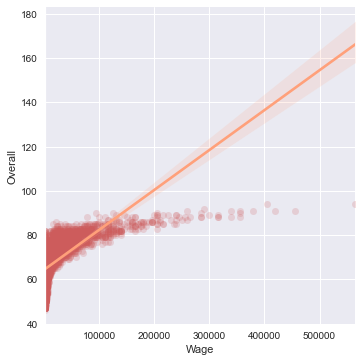

In [50]:
lmplot("Wage","Overall",fifa)

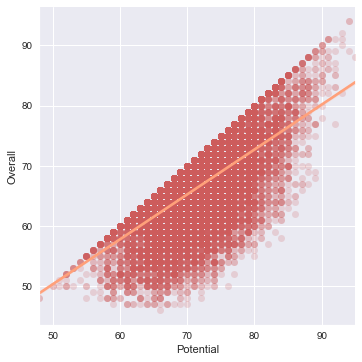

In [49]:
lmplot("Potential","Overall",fifa)

In [19]:
def distplot(x):
    sns.distplot(x)
    plt.show()

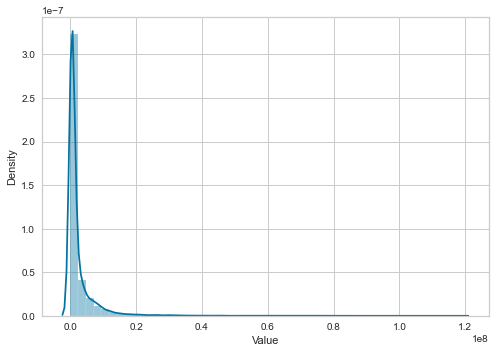

In [20]:
distplot(fifa["Value"])

**Preprocessing**

In [122]:
#checking distribution of value
stats.describe(fifa["Value"])

DescribeResult(nobs=17918, minmax=(0.0, 118500000.0), mean=2448628.7532090633, variance=31717218650358.113, skewness=7.024366613249771, kurtosis=75.83852087381798)

In [22]:
#checking distribution of wage
stats.describe(fifa["Wage"])

DescribeResult(nobs=17918, minmax=(1000.0, 565000.0), mean=9883.748186181494, variance=490302218.4222703, skewness=7.858363617114354, kurtosis=99.4354047519843)

In [23]:
#log transformation of value
stats.describe(np.log1p(fifa["Value"]))

DescribeResult(nobs=17918, minmax=(0.0, 18.590423526978277), mean=13.614465490110996, variance=2.092644372535135, skewness=-0.1494908766150543, kurtosis=4.41980240452996)

In [24]:
#log transformation of wage
stats.describe(np.log(fifa["Wage"]))

DescribeResult(nobs=17918, minmax=(6.907755278982137, 13.244581010128577), mean=8.278183136384268, variance=1.516816252155194, skewness=0.7227200951547951, kurtosis=-0.1746386229109418)

In [25]:
#duplicating fifa dataframe
fifa2 = fifa.copy()

In [26]:
#log transformation
fifa2["Value"] = np.log1p(fifa["Value"])
fifa2["Wage"] = np.log(fifa["Wage"])

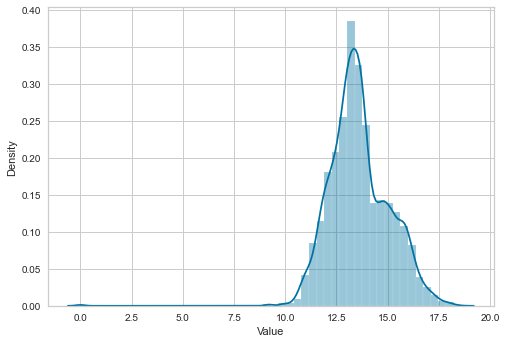

In [27]:
#checking distribution of Value again
distplot(fifa2["Value"])

In [65]:
# identifying columns with  correlation above 60% in order to avoid multicollinearity

# Create correlation matrix. Our dependent variable is Overall and we exclude goalkeepers
corr_matrix = fifa2[fifa2["Position"]!="GK"].drop(columns=["Overall","GKDiving", "GKHandling", "GKKicking", "GKPositioning", "GKReflexes"]).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.60
to_drop = [column for column in upper.columns if any(upper[column] > 0.60)]

In [66]:
# creating new dataframe only for linear regression
fifa_lr = fifa2[fifa2["Position"]!="GK"].drop(columns=['GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']).reset_index(drop=True).drop(columns=to_drop)

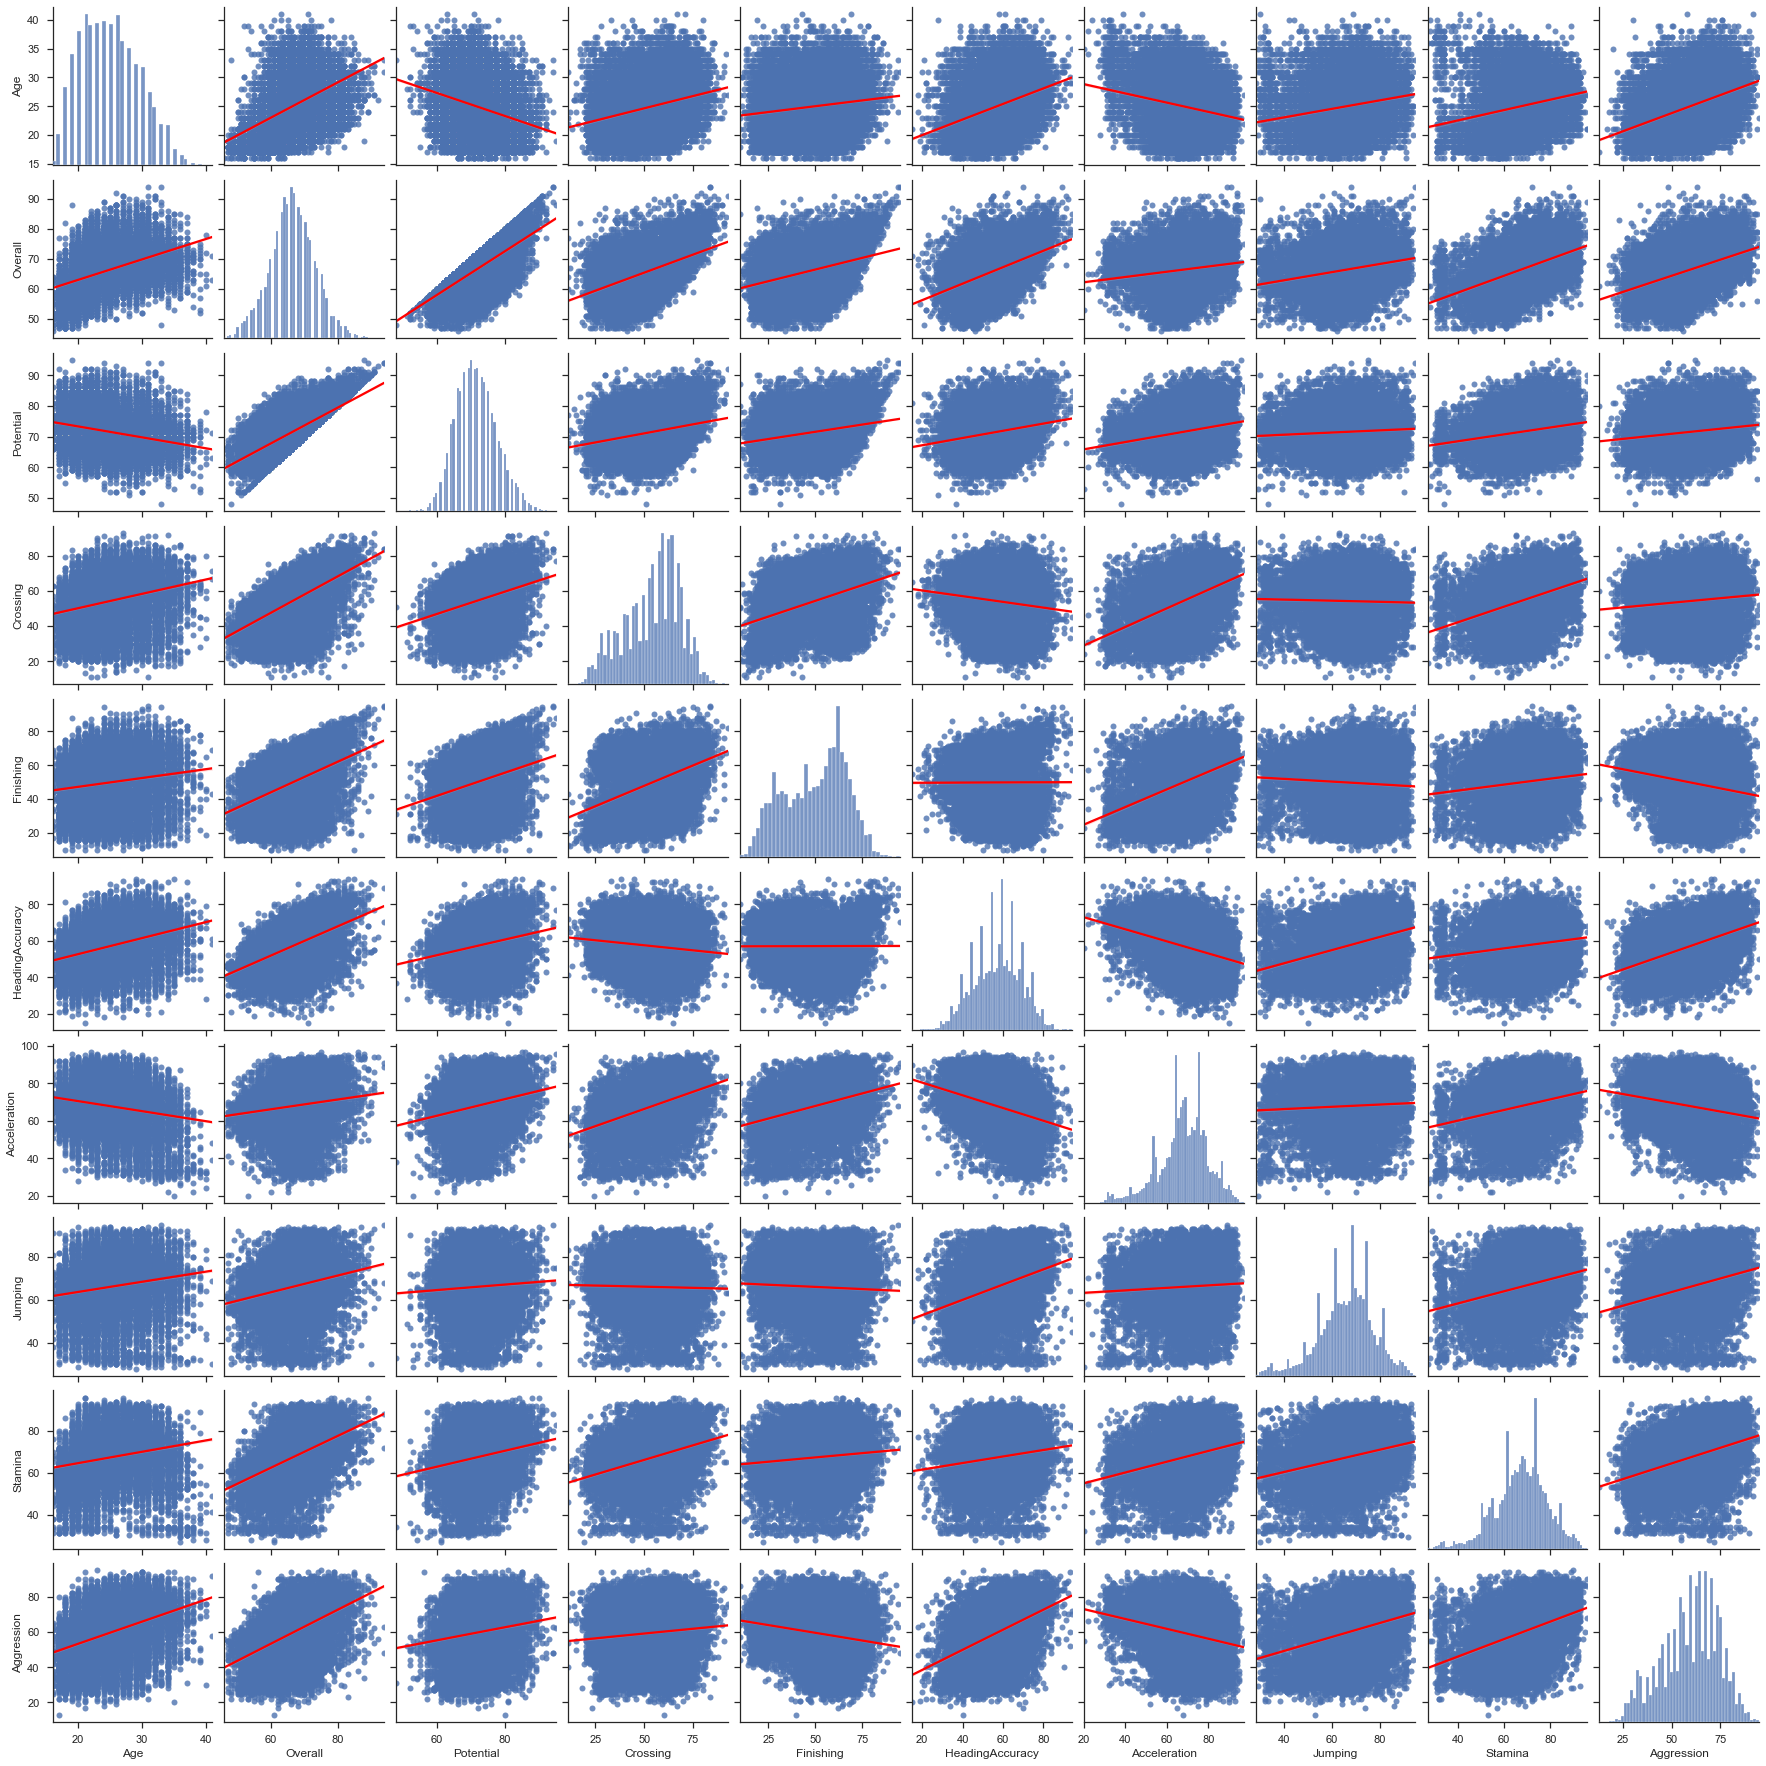

In [717]:
#pairplot with regression kind
sns.set(style="ticks", color_codes=True)
sns.pairplot(fifa_lr,plot_kws={'line_kws':{'color':'red'}},kind="reg")
plt.show()

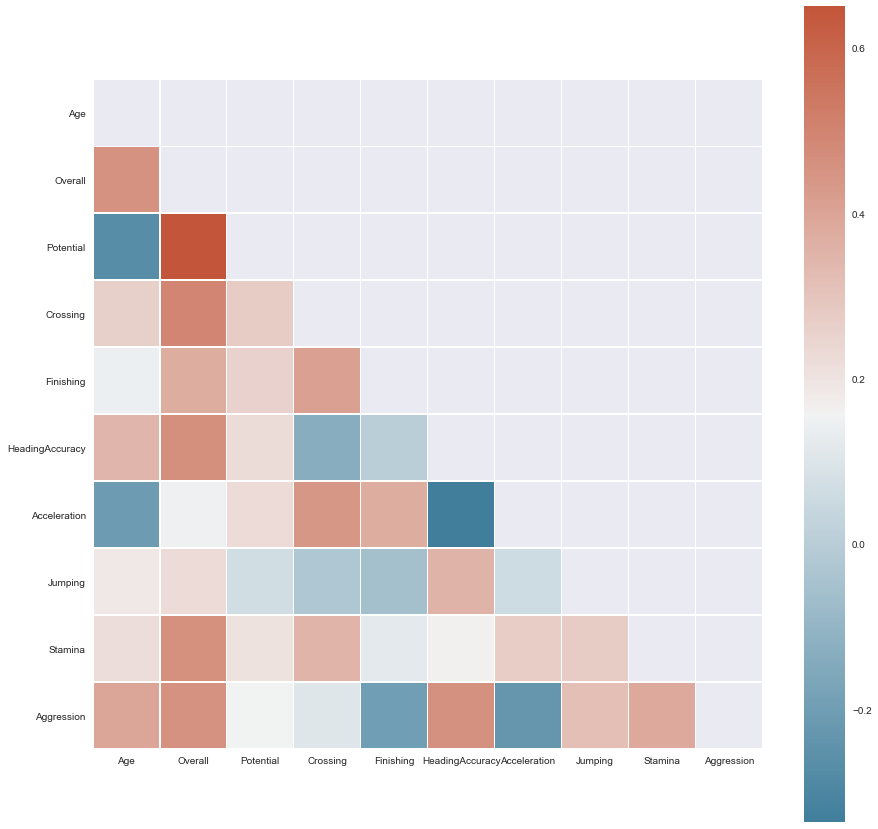

In [67]:
# heatmap vol.2 to check correlated columns
corr = fifa_lr.corr()
f, ax = plt.subplots(figsize=(15, 15))
mask = np.triu(np.ones_like(corr, dtype=bool)) # removing the other side of the heatmap
cmap = sns.diverging_palette(230, 20, as_cmap=True) #preparing cmap
sns.heatmap(corr,mask=mask,cmap=cmap,linewidths=.5,square=True)
plt.show()

In [68]:
#descriptive statistics
fifa_lr.describe().apply(lambda x: x.apply('{0:.5f}'.format)).T

,count,mean,std,min,25%,50%,75%,max
Age,15926.00000,24.99121,4.55287,16.00000,21.00000,25.00000,28.00000,41.00000
Overall,15926.00000,66.44619,6.80924,46.00000,62.00000,66.00000,71.00000,94.00000
Potential,15926.00000,71.52103,6.08393,48.00000,67.00000,71.00000,75.00000,95.00000
Crossing,15926.00000,54.18950,14.13071,11.00000,44.00000,56.00000,65.00000,93.00000
Finishing,15926.00000,49.78130,16.36058,10.00000,36.00000,52.00000,63.00000,95.00000
HeadingAccuracy,15926.00000,57.04019,11.61484,15.00000,49.00000,58.00000,65.00000,94.00000
Acceleration,15926.00000,67.89621,11.76875,20.00000,62.00000,69.00000,76.00000,97.00000
Jumping,15926.00000,66.04383,11.54958,28.00000,59.00000,67.00000,74.00000,95.00000
Stamina,15926.00000,67.30497,11.19897,27.00000,61.00000,68.00000,75.00000,96.00000
Aggression,15926.00000,59.57541,14.43294,13.00000,50.00000,61.00000,70.00000,95.00000


# Modelling

**Modelling with Numerical Independent Variables**

- modelling with only numerical independent variables our dependent variable is Overall

In [614]:
# first modelling only with numerical independent variables
X = fifa_lr.drop(columns=list(fifa_lr.select_dtypes(include = np.object).columns)).drop(columns=["Overall"]) #drop objects and dependent variable
y = fifa_lr["Overall"] #dependent variable

#train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

#model
model = LinearRegression()
model.fit(X_train,y_train)

#predictions and r2_score
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.8914908595460592

In [615]:
def features(x,y):
    plt.figure(figsize=(10,5))
    ax = sns.barplot(x=pd.DataFrame(y,x).sort_values(by=0,ascending=False).index, y=pd.DataFrame(y,x).sort_values(by=0,ascending=False)[0],data=pd.DataFrame(y,x).sort_values(by=0,ascending=False),palette="Blues_r")
    ax.set_xticklabels(pd.DataFrame(y,x).sort_values(by=0,ascending=False).index,rotation=90)
    ax.set(xlabel="Features",ylabel="Coefficient")
    plt.title("Importance of Features")
    plt.show()

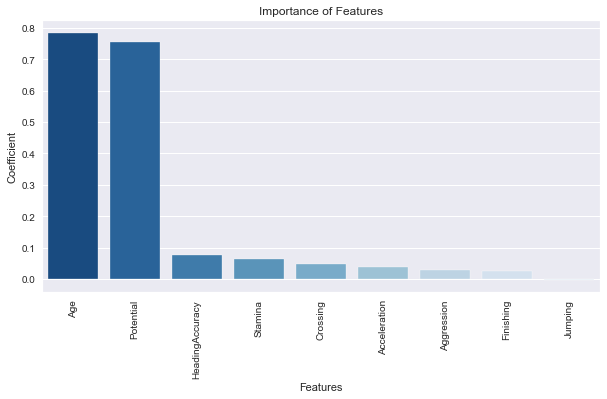

In [616]:
features(X_train.columns,model.coef_)

In [617]:
#residuals plot function
#Residualsplot and seaborn needs to be imported before
def yellowbrick(x,y,model):
    #x: X_traim, y: y_train, model: model
    plt.figure(figsize=(10,5))
    sns.set_style("darkgrid")
    visualizer = ResidualsPlot(model,hist=False)
    visualizer.fit(x,y)
    plt.title("Residuals")
    plt.show()

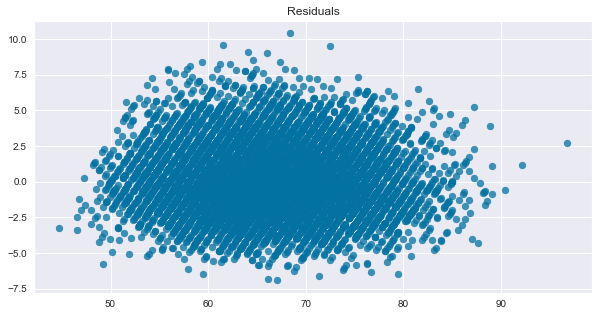

In [618]:
yellowbrick(X_train,y_train,model)

In [619]:
#regplot function
def regplot(x,y,ylabel):
    #x: y_pred
    #y: y_test
    plt.figure(figsize=(10,5))
    sns.regplot(x,y,line_kws={"color":"indianred"})
    plt.xlabel('Predictions')
    plt.ylabel(ylabel)
    plt.title('Predictions vs {}'.format(ylabel))
    plt.show()

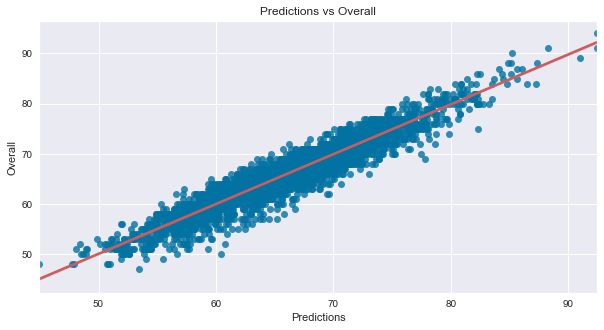

In [620]:
regplot(y_pred,y_test,"Overall")

**Modelling with Numerical Independent Variables and with Selected Features**

- our independent variables are still only numerical, dependent variable is Overall

In [601]:
rfe = RFE(estimator=LinearRegression(),n_features_to_select=3)
rfe.fit(X,y)
ranking = pd.DataFrame(rfe.ranking_,X.columns).rename(columns={"index":"features",0:"ranking"}).sort_values(by="ranking").reset_index()
print(ranking)

             index  ranking
0              Age        1
1        Potential        1
2          Stamina        1
3  HeadingAccuracy        2
4         Crossing        3
5     Acceleration        4
6       Aggression        5
7        Finishing        6
8          Jumping        7


In [602]:
X = fifa_lr[list(ranking[ranking.ranking==1]["index"].values)] #independent variables with ranking 1 based on RFE
y = fifa_lr["Overall"] #dependent variable

#traing and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

#model
model = LinearRegression()
model.fit(X_train,y_train)

#prediction and r2_score
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.8701561660391961

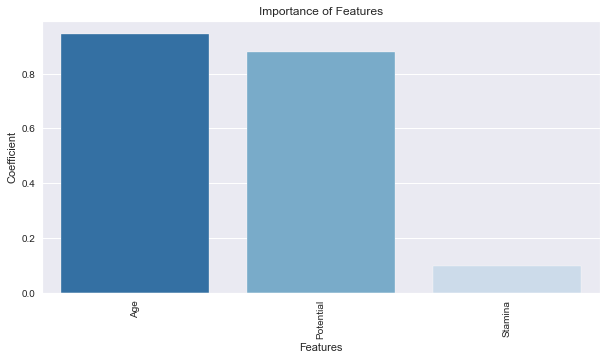

In [603]:
features(X_train.columns,model.coef_)

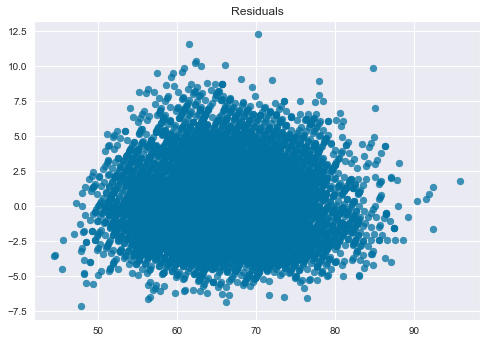

In [75]:
yellowbrick(X_train,y_train,model)

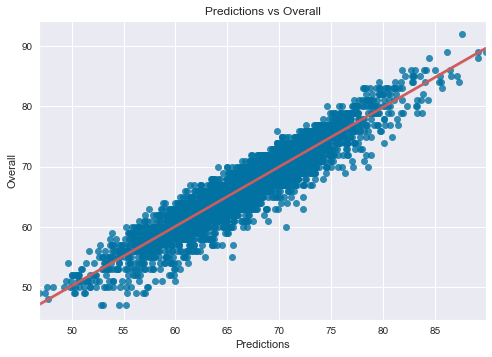

In [76]:
regplot(y_pred,y_test,"Overall")

**Modelling with Independent Categorical and Numerical Variable**


- adding also positions and preferred foot so there are numerical,categorical and binary data as independent variable and Overall as dependent variable

In [604]:
#simplfy the positions
positions = {"RB":"DF","LB":"DF","CB":"DF","LCB":"DF","RCB":"DF","RWB":"DF","LWB":"DF",
             "LDM":"DM","CDM":"DM","RDM":"DM","LM":"MF","LCM":"MF","CM":"MF","RCM":"MF",
             "RM":"MF","LAM":"AM","CAM":"AM","RAM":"AM","LW":"AM",
             "RW":"AM","RS":"ST","ST":"ST","LS":"ST","CF":"ST","LF":"ST","RF":"ST"}
fifa_lr["simple_position"] = fifa_lr["Position"].map(positions)

In [605]:
#OneHotEncoder of categorical variables
cat = fifa_lr[["simple_position","Preferred Foot"]]
enc = OneHotEncoder(drop="first")
categorical = pd.DataFrame(enc.fit_transform(cat).toarray(), columns = enc.get_feature_names())
categorical.head()

,x0_DF,x0_DM,x0_MF,x0_ST,x1_Right
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,1.0,1.0


In [606]:
y = fifa_lr['Overall'] #dependent variable
X = fifa_lr.drop(columns=list(fifa_lr.select_dtypes(include = np.object).columns)).drop(columns=["Overall"]) #independent numerical variables
X = pd.concat((X, categorical),axis=1).dropna() #concat independent numerical and categorical variables

#train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

#model
model = LinearRegression()
model.fit(X_train,y_train)

#prediction and r2_score
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.8894995671005366

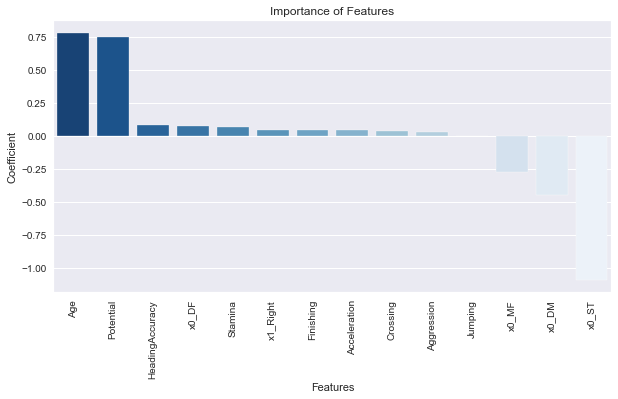

In [607]:
features(X_train.columns,model.coef_)

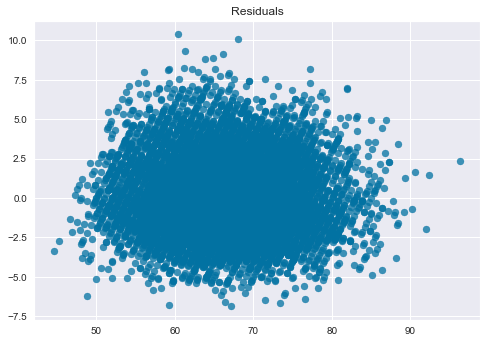

In [80]:
yellowbrick(X_train,y_train,model)

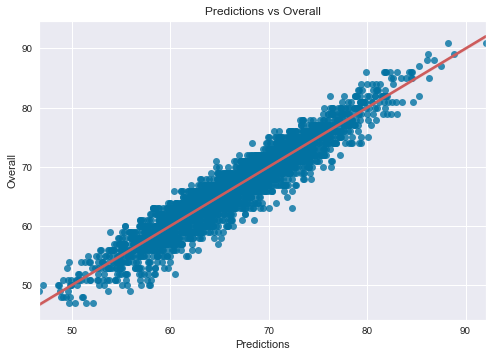

In [81]:
regplot(y_pred,y_test,"Overall")

**Modelling with Independent Categorical and Numerical Variable with Selected Features**

- there are numerical and categorical independent variables, dependent variable is Overall

In [571]:
rfe = RFE(estimator=LinearRegression(),n_features_to_select=3)
rfe.fit(X,y)
ranking = pd.DataFrame(rfe.ranking_,X.columns).rename(columns={"index":"features",0:"ranking"}).sort_values(by="ranking").reset_index()
print(ranking)

              index  ranking
0               Age        1
1         Potential        1
2             x0_ST        1
3             x0_DF        2
4           Stamina        3
5         Finishing        4
6             x0_DM        5
7             x0_MF        6
8          x1_Right        7
9   HeadingAccuracy        8
10     Acceleration        9
11         Crossing       10
12       Aggression       11
13          Jumping       12


In [572]:
y = fifa_lr['Overall'] #dependent variable
X = X[list(ranking[ranking.ranking==1]["index"].values)] #independent categorical and numerical variables

#train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

#model
model = LinearRegression()
model.fit(X_train,y_train)

#prediction and r2_score
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.8494477549091642

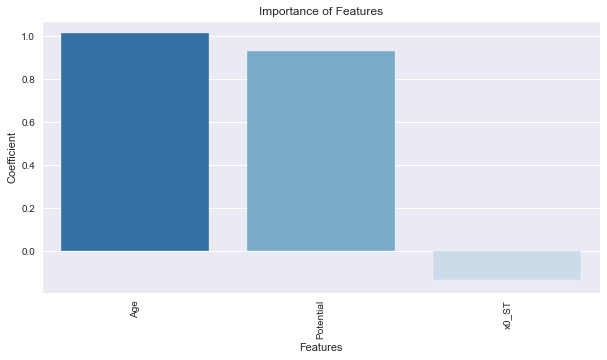

In [573]:
features(X_train.columns,model.coef_)

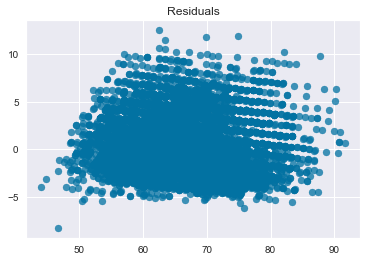

In [447]:
yellowbrick(X_train,y_train,model)

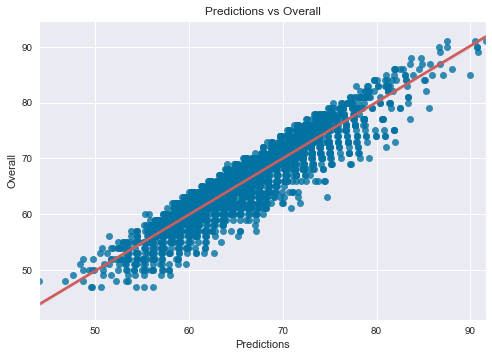

In [85]:
regplot(y_pred,y_test,"Overall")

# Modelling in a Function

merging all modelling into one function

In [622]:
#residuals plot function
#Residualsplot and seaborn needs to be imported before
def yellowbrick(x,y,model):
    #x: X_traim, y: y_train, model: model
    sns.set_style("darkgrid")
    visualizer = ResidualsPlot(model,hist=False)
    visualizer.fit(x,y)
    plt.title("Residuals")

#regplot function
def regplot(x,y,ylabel):
    #x: y_pred
    #y: y_test
    sns.regplot(x,y,line_kws={"color":"indianred"})
    plt.xlabel('Predictions')
    plt.ylabel(ylabel)
    plt.title('Predictions vs {}'.format(ylabel))
    plt.show()
    

def linreg(y,ylabel="Overall",df=fifa,corr=0.60,categorical=False,rfe=False):
    
    #y: as the data cleaning is not automated, you should use "Overall" (string)
    #ylabel: you can choose any string. Default is "Overall". This for visualization
    #df: fifa_lr which is the dataframe that has been created for linear regression
    #categorical: default is False. If you want to include categorical variables, it needs to be True
    #rfe: recursive feature elimination. If you want to choose only the important features, it needs to be True
    
    #import OneHotEncoder, pandas, RFE, LinearRegression, train_test_split, seaborn and matplotlib.pyplot
    # identifying columns with  correlation above 60% in order to avoid multicollinearity
    
    df = df.copy()
    
    df["Value"] = np.log1p(df["Value"])
    df["Wage"] = np.log(df["Wage"])

    corr_matrix = df[df["Position"]!="GK"].drop(columns=[y,"GKDiving", "GKHandling", "GKKicking", "GKPositioning", "GKReflexes"]).corr().abs()

    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    to_drop = [column for column in upper.columns if any(upper[column] > corr)]
    
    # creating new dataframe only for linear regression
    df = df[df["Position"]!="GK"].drop(columns=['GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']).reset_index(drop=True).drop(columns=to_drop)
    
    positions = {"RB":"DF","LB":"DF","CB":"DF","LCB":"DF","RCB":"DF","RWB":"DF","LWB":"DF",
             "LDM":"DM","CDM":"DM","RDM":"DM","LM":"MF","LCM":"MF","CM":"MF","RCM":"MF",
             "RM":"MF","LAM":"AM","CAM":"AM","RAM":"AM","LW":"AM",
             "RW":"AM","RS":"ST","ST":"ST","LS":"ST","CF":"ST","LF":"ST","RF":"ST"}
    
    df["simple_position"] = df["Position"].map(positions)
        
    cat = df[["simple_position","Preferred Foot"]]
    enc = OneHotEncoder(drop="first")
    cat2 = pd.DataFrame(enc.fit_transform(cat).toarray(), columns = enc.get_feature_names())
    
    if categorical==False and rfe==False:
        X = df.drop(columns=list(df.select_dtypes(include = np.object).columns)).drop(columns=[y])
        y = df[y]
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
        model = LinearRegression()
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        
    elif categorical==False and rfe==True:
        X = df.drop(columns=list(df.select_dtypes(include = np.object).columns)).drop(columns=[y])
        y = df[y]
        
        rfe = RFE(estimator=LinearRegression(),n_features_to_select=3)
        rfe.fit(X,y)
        ranking = pd.DataFrame(rfe.ranking_,X.columns).rename(columns={"index":"features",0:"ranking"}).sort_values(by="ranking").reset_index()
    
        X = df[list(ranking[ranking.ranking==1]["index"].values)]
         
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
        model = LinearRegression()
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        
    elif categorical==True and rfe==False:    
        X = df.drop(columns=list(df.select_dtypes(include = np.object).columns)).drop(columns=[y])
        X = pd.concat((X, cat2),axis=1).dropna()
        y = df[y]
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
        model = LinearRegression()
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        
    else:
        X = df.drop(columns=list(df.select_dtypes(include = np.object).columns)).drop(columns=[y])
        X = pd.concat((X, cat2),axis=1).dropna()
        y = df[y]
        
        rfe = RFE(estimator=LinearRegression(),n_features_to_select=3)
        rfe.fit(X,y)
        ranking = pd.DataFrame(rfe.ranking_,X.columns).rename(columns={"index":"features",0:"ranking"}).sort_values(by="ranking").reset_index()
        
        X = X[list(ranking[ranking.ranking==1]["index"].values)]
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
        model = LinearRegression()
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
    
    gs = gridspec.GridSpec(2, 2)
    fig = plt.figure(figsize=(10,15))
    fig.suptitle("R-Square: {}\n MSE: {}\n RMSE: {} ".format(r2_score(y_test, y_pred),mean_squared_error(y_test, y_pred),mean_squared_error(y_test, y_pred,squared=False)))
    
    ax1 = fig.add_subplot(gs[0, 0]) # row 0, col 0
    yellowbrick(X_train,y_train,model)
    
    ax2 = fig.add_subplot(gs[0, 1]) # row 0, col 1
    regplot(y_pred,y_test,ylabel) 
    
    ax3 = fig.add_subplot(gs[1, :]) # row 1, span all columns
    features(X_train.columns,model.coef_)
    
    plt.show()

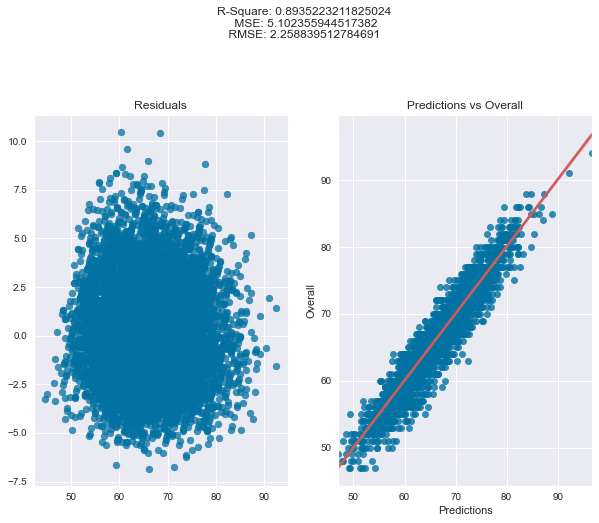

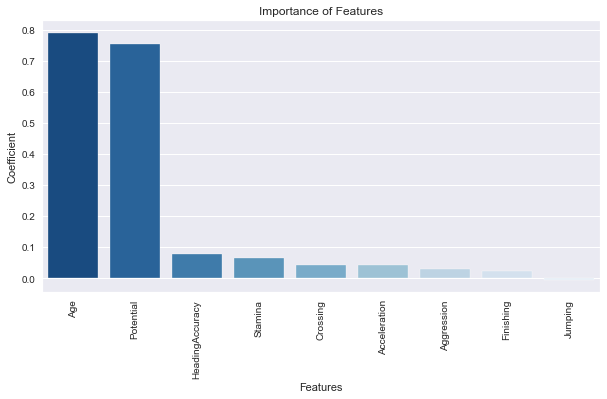

In [623]:
linreg("Overall",corr=0.60)

***summary of the work is on readme file***